As part of your duties as senior data scientist for the famous ThomasTrain company, you are assigned to understand the satisfaction of the customers even without a direct evaluation. 
To accomplish this task, the company provided you with the “trains_dataset.csv”.
 Understanding the customers’ satisfaction will help the marketing team to effectively target users with promotions and making the retention higher.


Assignment:
- Perform an Explanatory data analysis (EDA) with visualization;
- Generate a training and test set. The test set should be used only at the end;
- Preprocess the dataset (remove outliers, impute missing values, encode categorical features with one hot encoding, not necessarily in this order). Your goal is to estimate whether a customer is satisfied;
- Define whether this is a regression, classification or clustering problem, explain why and choose your model design accordingly. Test at least 3 different models. First, create a validation set from the training set to analyze the behaviour with the default hyperparameters. Then use cross-validation to find the best set of hyperparameters. You must describe every hyperparameter tuned (the more, the better);
- Select the best architecture using the right metric;
- Finally, compute the performances of the test set.


# Importing libraries

In [76]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

# Reading the input file

In [77]:
df_trains = pd.read_csv('trains.csv')

# EDA

# 1) Understanding the dataset

### 1.1) General overview of the dataset

In [78]:
df_trains.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


### 1.2) Showing the dimension of the dataset

In [79]:
df_trains.shape  # outputs number of rows x number of columns

(129880, 25)

The dataset has 129880 rows and 25 columns

### 1.3) Gathering information from data

In [80]:
df_trains.info()  # outputs column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Legroom Service Rating         129880 non-null  int64  
 1   Onboard General Rating         129880 non-null  int64  
 2   Food'n'Drink Rating            129880 non-null  int64  
 3   Age                            129880 non-null  int64  
 4   Departure Arrival Time Rating  129880 non-null  int64  
 5   Onboard WiFi Rating            129880 non-null  int64  
 6   Ticket ID                      129880 non-null  int64  
 7   Checkin Rating                 129880 non-null  int64  
 8   Track Location Rating          129880 non-null  int64  
 9   Baggage Handling Rating        129880 non-null  int64  
 10  Arrival Delay in Minutes       129487 non-null  float64
 11  Ticket Class                   129880 non-null  object 
 12  Loyalty                       

This visulaization let us notice that almost every column has complete informations (hence, 0 null values), only 'Arrival delay in Minutes' column has some missing values.

Moreover we can see that among 25 variables, only 6 are categorical, while 19 are numerical.

In [81]:
# Check for missing values

missing_values = df_trains.isnull().sum()
missing_values

Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64

In particular, 'Arrival Delay in minutes' column has 393 missing values.

### 1.4) Handling missing values

Although it may look like a task concerning data cleaning, we will handle missing values in EDA in order to plot data and have a better visualization. In particular, to handle missing values, we will replace them with the mode.  

We will avoid both rowise and columnswise deletion, thus mantaining as much information as possible to build a more accurate model.

In [82]:
for column in df_trains.columns:
    df_trains[column].fillna(df_trains[column].mode()[0], inplace=True)
df_trains.isnull().sum()

Legroom Service Rating           0
Onboard General Rating           0
Food'n'Drink Rating              0
Age                              0
Departure Arrival Time Rating    0
Onboard WiFi Rating              0
Ticket ID                        0
Checkin Rating                   0
Track Location Rating            0
Baggage Handling Rating          0
Arrival Delay in Minutes         0
Ticket Class                     0
Loyalty                          0
Gender                           0
Boarding Rating                  0
Online Booking Rating            0
Satisfied                        0
Onboard Entertainment Rating     0
Date and Time                    0
Distance                         0
Seat Comfort Rating              0
Work or Leisure                  0
Departure Delay in Minutes       0
Onboard Service Rating           0
Cleanliness Rating               0
dtype: int64

We used a single *for* loop, that iterates over the columns of the dataframe and replaces the missing rows of each column with its mode. Using the command *.isnull().sum()*, we notice that there are no longer columns containing missing values.

### 1.5) Relevant features of numeric variables

Thanks to the function *describe*, one can show the most interesting features for each numerical variable, such as mean, standard deviation, quartiles, minimum and maximum.

In [83]:
# Explore basic statistics

summary_stats = df_trains.describe()
summary_stats

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,Arrival Delay in Minutes,Boarding Rating,Online Booking Rating,Onboard Entertainment Rating,Distance,Seat Comfort Rating,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,1.298800e+05,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,3.350878,3.642193,3.204774,39.427957,3.057599,2.728696,5.494025e+06,3.306267,2.976925,3.632114,15.045465,3.252633,2.756876,3.358077,1190.316392,3.441361,14.713713,3.383023,3.286326
std,1.316252,1.176669,1.329933,15.119360,1.526741,1.329340,2.596965e+06,1.266185,1.278520,1.180025,38.416353,1.350719,1.401740,1.334049,997.452477,1.319289,38.071126,1.287099,1.313682
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000025e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,2.000000,27.000000,2.000000,2.000000,3.239218e+06,3.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,414.000000,2.000000,0.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,40.000000,3.000000,3.000000,5.495646e+06,3.000000,3.000000,4.000000,0.000000,3.000000,3.000000,4.000000,844.000000,4.000000,0.000000,4.000000,3.000000
75%,4.000000,5.000000,4.000000,51.000000,4.000000,4.000000,7.739715e+06,4.000000,4.000000,5.000000,13.000000,4.000000,4.000000,4.000000,1744.000000,5.000000,12.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,85.000000,5.000000,5.000000,9.999975e+06,5.000000,5.000000,5.000000,1584.000000,5.000000,5.000000,5.000000,4983.000000,5.000000,1592.000000,5.000000,5.000000


This overview enables us to highlight some insights. Among the latter we find that:

- 

### 1.6) Insights on categorical variables

Through the function *.info()* we found out that among the 25 variabes, 6 of them were categorical.
The latter are the following: 
- Ticket class
- Loyalty
- Gender
- Date and time
- Satisfied
- Work or leisure


Insights of *Ticket class*

In [84]:
df_trains['Ticket Class'].value_counts() # how many times each unique ticket class appears

Premium    62160
Economy    58309
Smart       9411
Name: Ticket Class, dtype: int64

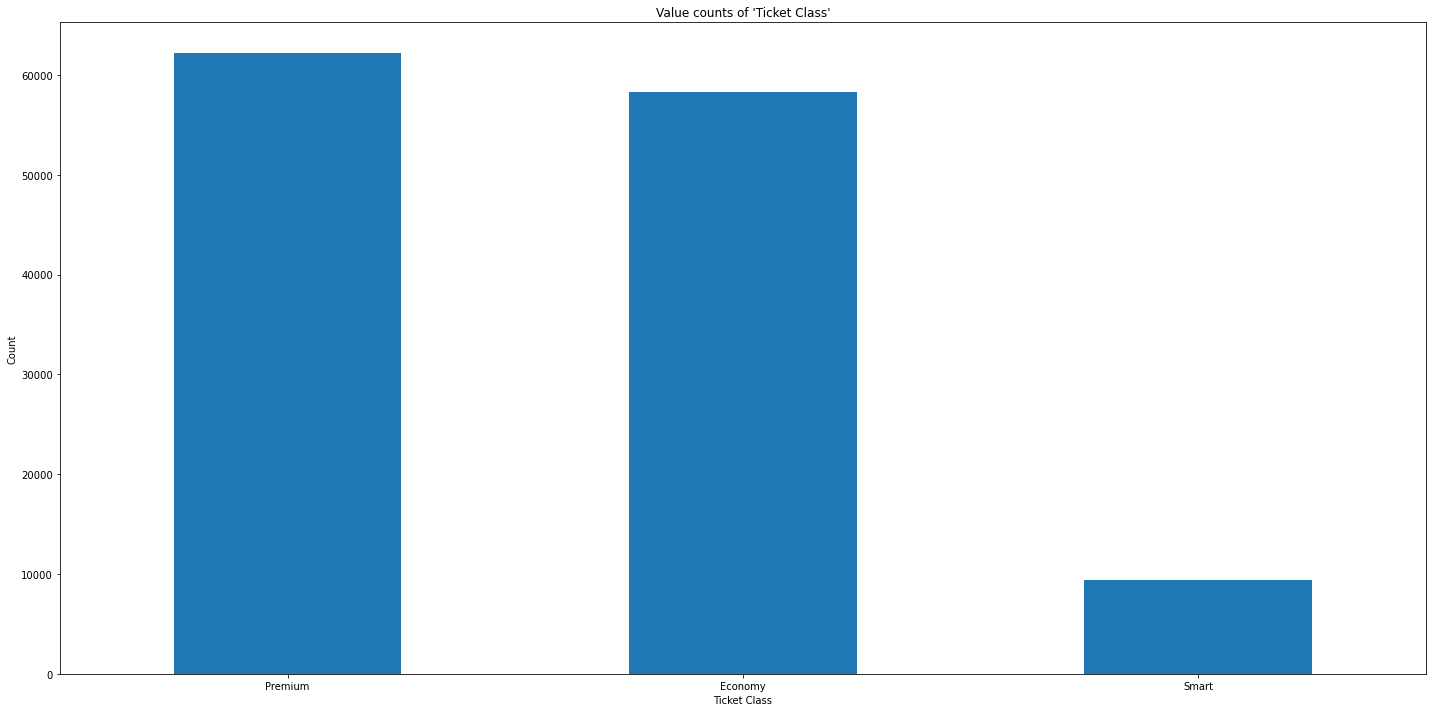

In [85]:
plt.figure(figsize=(20,10))
df_trains['Ticket Class'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Ticket Class'")
plt.xlabel("Ticket Class")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Insights of *Loyalty*

In [86]:
df_trains['Loyalty'].value_counts() # how many times  appears

Loyal       106100
Disloyal     23780
Name: Loyalty, dtype: int64

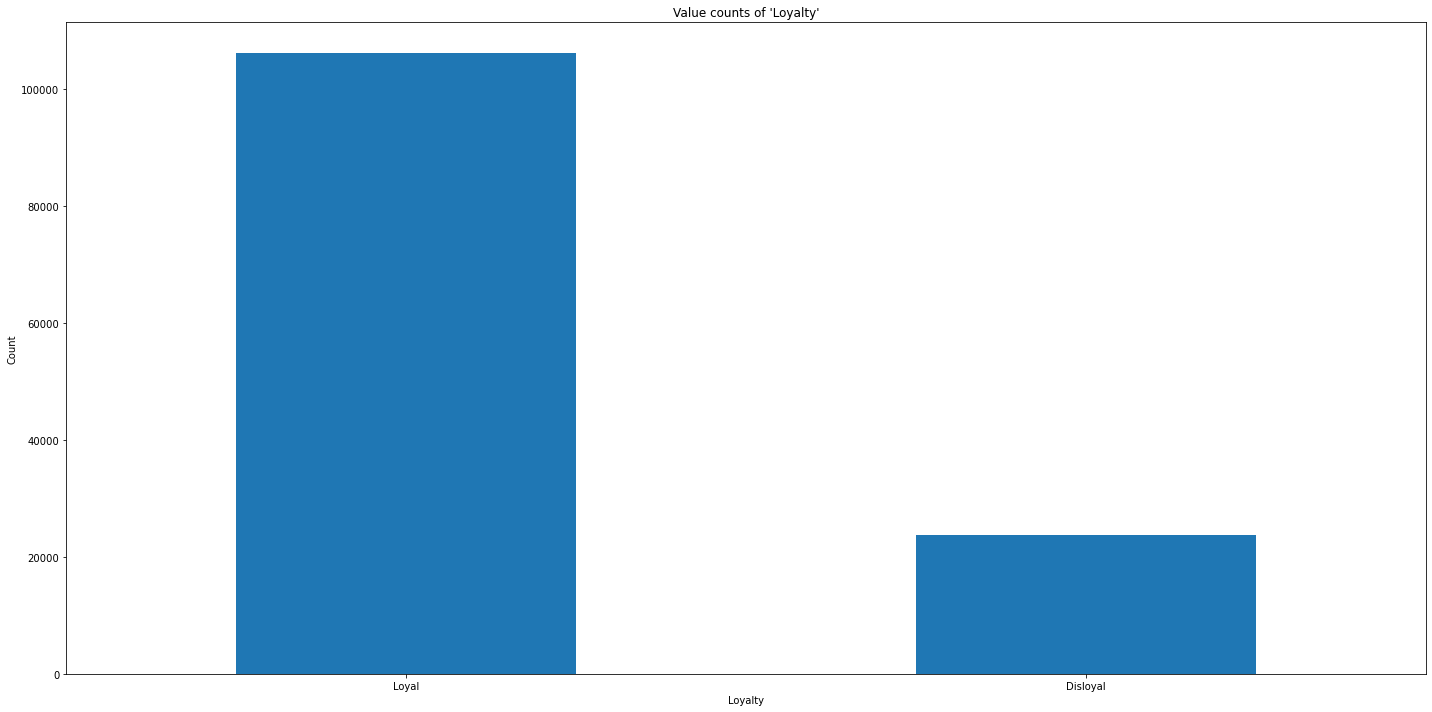

In [87]:
plt.figure(figsize=(20,10))
df_trains['Loyalty'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Loyalty'")
plt.xlabel("Loyalty")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Insights of *Gender*

In [88]:
df_trains['Gender'].value_counts() # how many times  appears

F    65899
M    63981
Name: Gender, dtype: int64

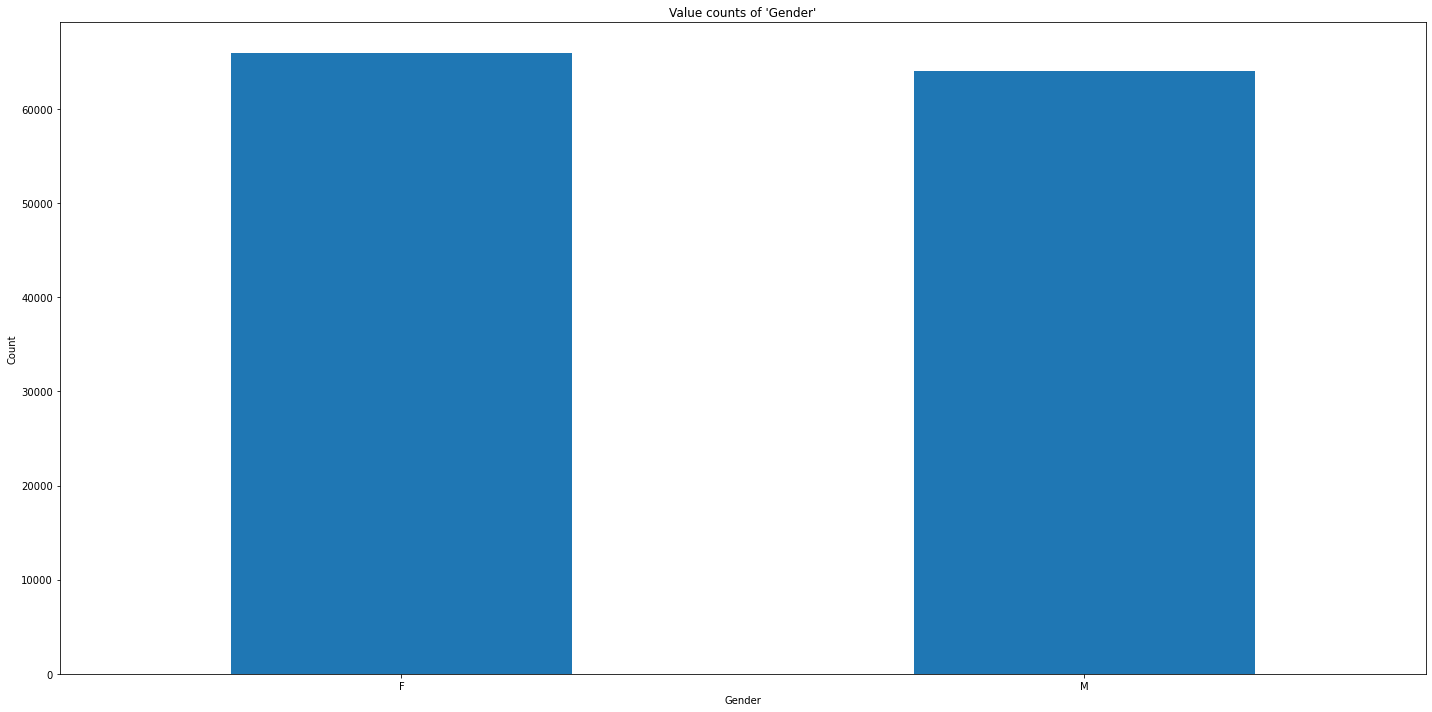

In [89]:
plt.figure(figsize=(20,10))
df_trains['Gender'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Gender'")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Insights of *Date and time*

In [90]:
df_trains['Date and Time'].value_counts() # how many times  appears

2016-02-26 13:24    17
2016-02-22 09:35    17
2016-02-24 03:40    17
2016-02-16 00:09    16
2016-02-17 08:26    16
                    ..
2016-03-01 02:49     1
2016-02-24 02:32     1
2016-02-15 13:05     1
2016-02-22 05:11     1
2016-02-27 23:48     1
Name: Date and Time, Length: 22667, dtype: int64

In [ ]:
plt.figure(figsize=(20,10))
df_trains['Date and Time'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Date and Time'")
plt.xlabel("Date and Time")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Insights of *Satisfied*

In [91]:
df_trains['Satisfied'].value_counts() # how many times  appears

N    73452
Y    56428
Name: Satisfied, dtype: int64

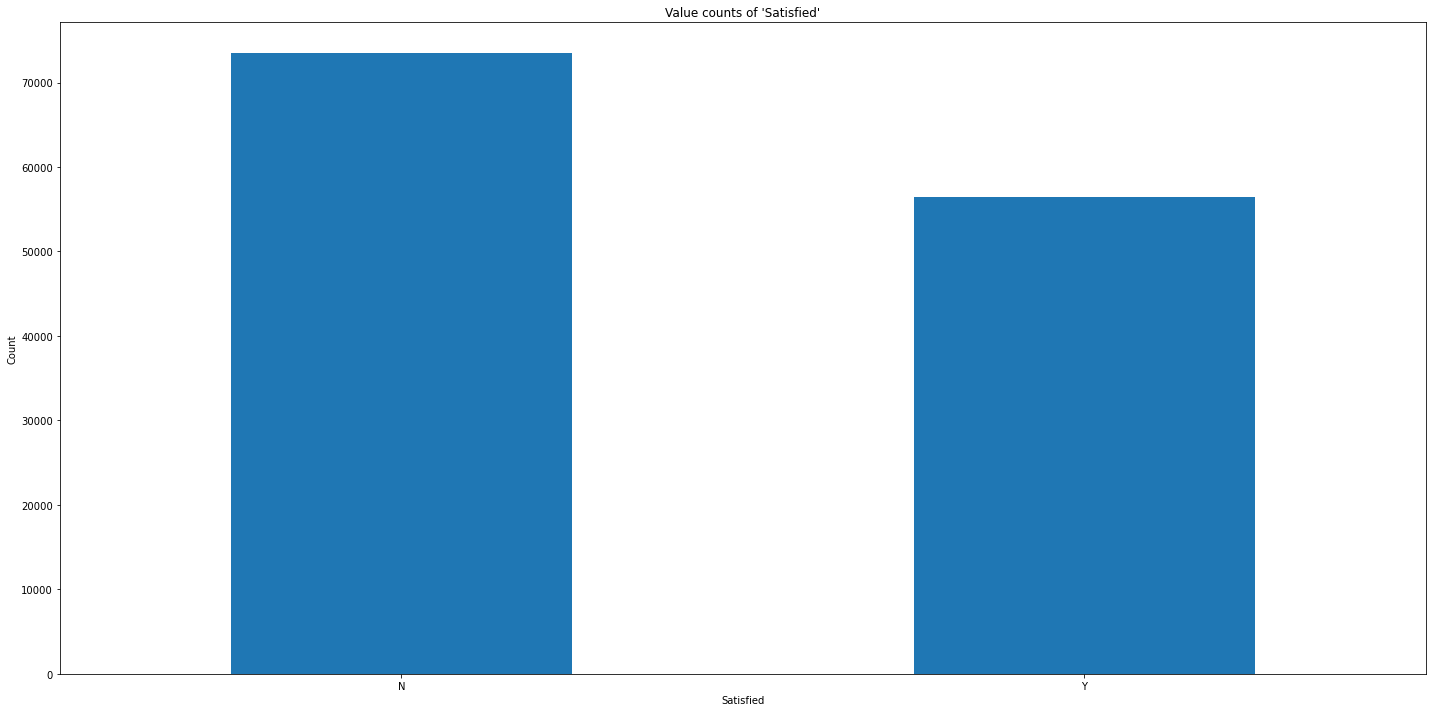

In [92]:
plt.figure(figsize=(20,10))
df_trains['Satisfied'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Satisfied'")
plt.xlabel("Satisfied")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Insights of *Work or leisure*

In [93]:
df_trains['Work or Leisure'].value_counts() # how many times  appears

work       89693
leisure    40187
Name: Work or Leisure, dtype: int64

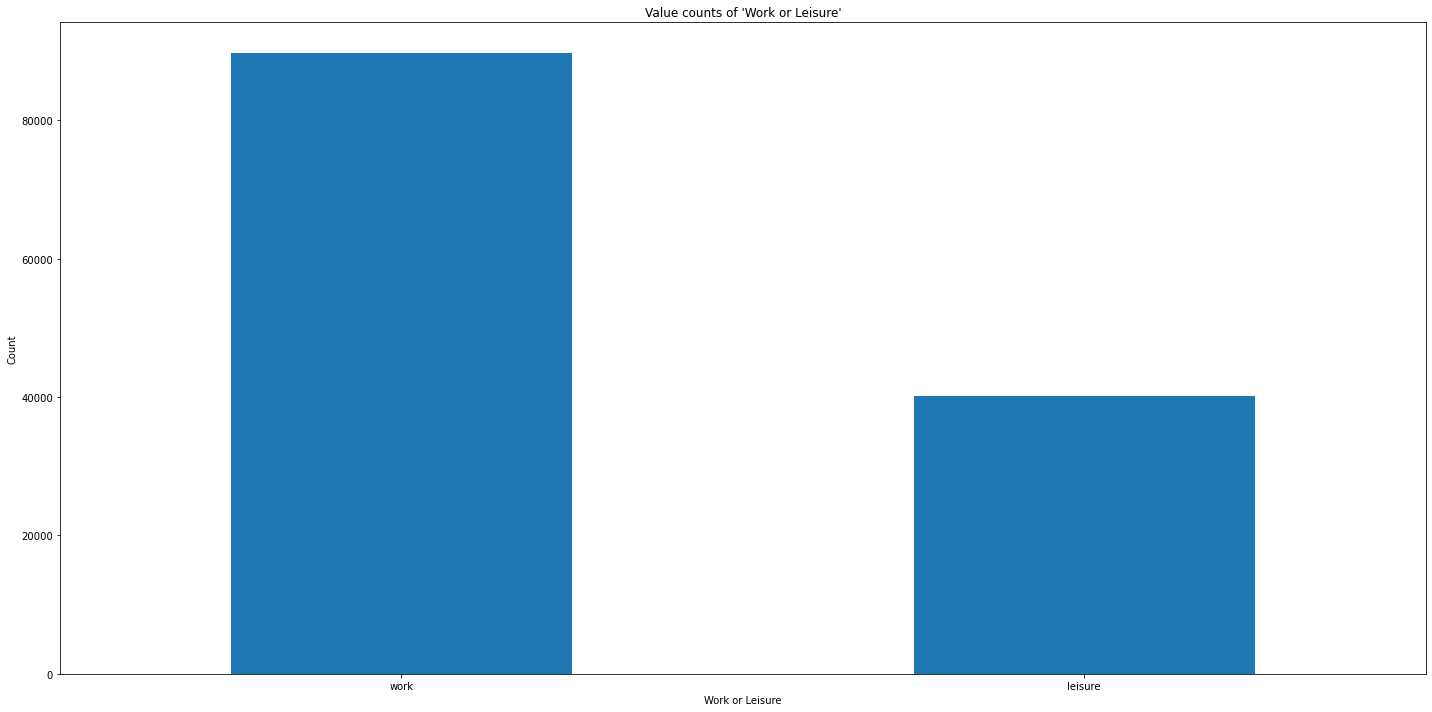

In [94]:
plt.figure(figsize=(20,10))
df_trains['Work or Leisure'].value_counts().plot(kind="bar")
plt.title("Value counts of 'Work or Leisure'")
plt.xlabel("Work or Leisure")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### 1.7) Insights on numerical variables

Since we're focusing on numerical variables, it is possible to compute correlation. In order to achieve such goal we will use the *.corr()* function. 

In [95]:
df_trains.corr()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,Arrival Delay in Minutes,Boarding Rating,Online Booking Rating,Onboard Entertainment Rating,Distance,Seat Comfort Rating,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
Legroom Service Rating,1.000000,0.369569,0.033173,0.039119,0.010617,0.160317,0.001323,0.152693,-0.005181,0.371455,0.011384,0.123225,0.109450,0.300397,0.134533,0.104272,0.014574,0.357721,0.096695
Onboard General Rating,0.369569,1.000000,0.035210,-0.051347,0.072195,0.110029,-0.002021,0.237601,0.000310,0.629237,-0.059685,0.074058,0.035373,0.406094,0.059316,0.068842,-0.054432,0.551569,0.090356
Food'n'Drink Rating,0.033173,0.035210,1.000000,0.023194,0.000687,0.132214,-0.002888,0.085198,-0.002872,0.035321,-0.031685,0.233500,0.030514,0.623461,0.057066,0.575846,-0.029164,0.057404,0.658054
Age,0.039119,-0.051347,0.023194,1.000000,0.036960,0.016116,-0.000428,0.033475,-0.000398,-0.047991,-0.011206,0.207572,0.022565,0.074947,0.099459,0.159136,-0.009041,0.057078,0.052565
Departure Arrival Time Rating,0.010617,0.072195,0.000687,0.036960,1.000000,0.344915,-0.001461,0.091132,0.447510,0.070833,-0.001005,0.072287,0.437620,-0.008380,-0.018914,0.008666,0.000778,0.067297,0.009862
Onboard WiFi Rating,0.160317,0.110029,0.132214,0.016116,0.344915,1.000000,-0.001483,0.043762,0.338573,0.120376,-0.017762,0.457445,0.714807,0.207802,0.006701,0.121513,-0.015946,0.119928,0.131300
Ticket ID,0.001323,-0.002021,-0.002888,-0.000428,-0.001461,-0.001483,1.000000,-0.001120,-0.002590,-0.000571,-0.003507,0.002205,-0.002073,-0.002896,0.002225,-0.004080,-0.004186,0.000847,-0.003873
Checkin Rating,0.152693,0.237601,0.085198,0.033475,0.091132,0.043762,-0.001120,1.000000,-0.039353,0.234503,-0.021675,0.204238,0.008819,0.119554,0.073608,0.189979,-0.018752,0.244619,0.176658
Track Location Rating,-0.005181,0.000310,-0.002872,-0.000398,0.447510,0.338573,-0.002590,-0.039353,1.000000,0.000972,0.005643,0.002756,0.460041,0.002741,0.005520,0.002788,0.005973,-0.029019,-0.005918
Baggage Handling Rating,0.371455,0.629237,0.035321,-0.047991,0.070833,0.120376,-0.000571,0.234503,0.000972,1.000000,-0.007997,0.083541,0.039148,0.379123,0.064855,0.074620,-0.004105,0.520296,0.097071


We are interested in generating a plot for each numerical variable. Recall that the dataset consists of 19 numerical variables, hence, we get to 19 numerical variables of interest. The idea is to generate 17 subplots.

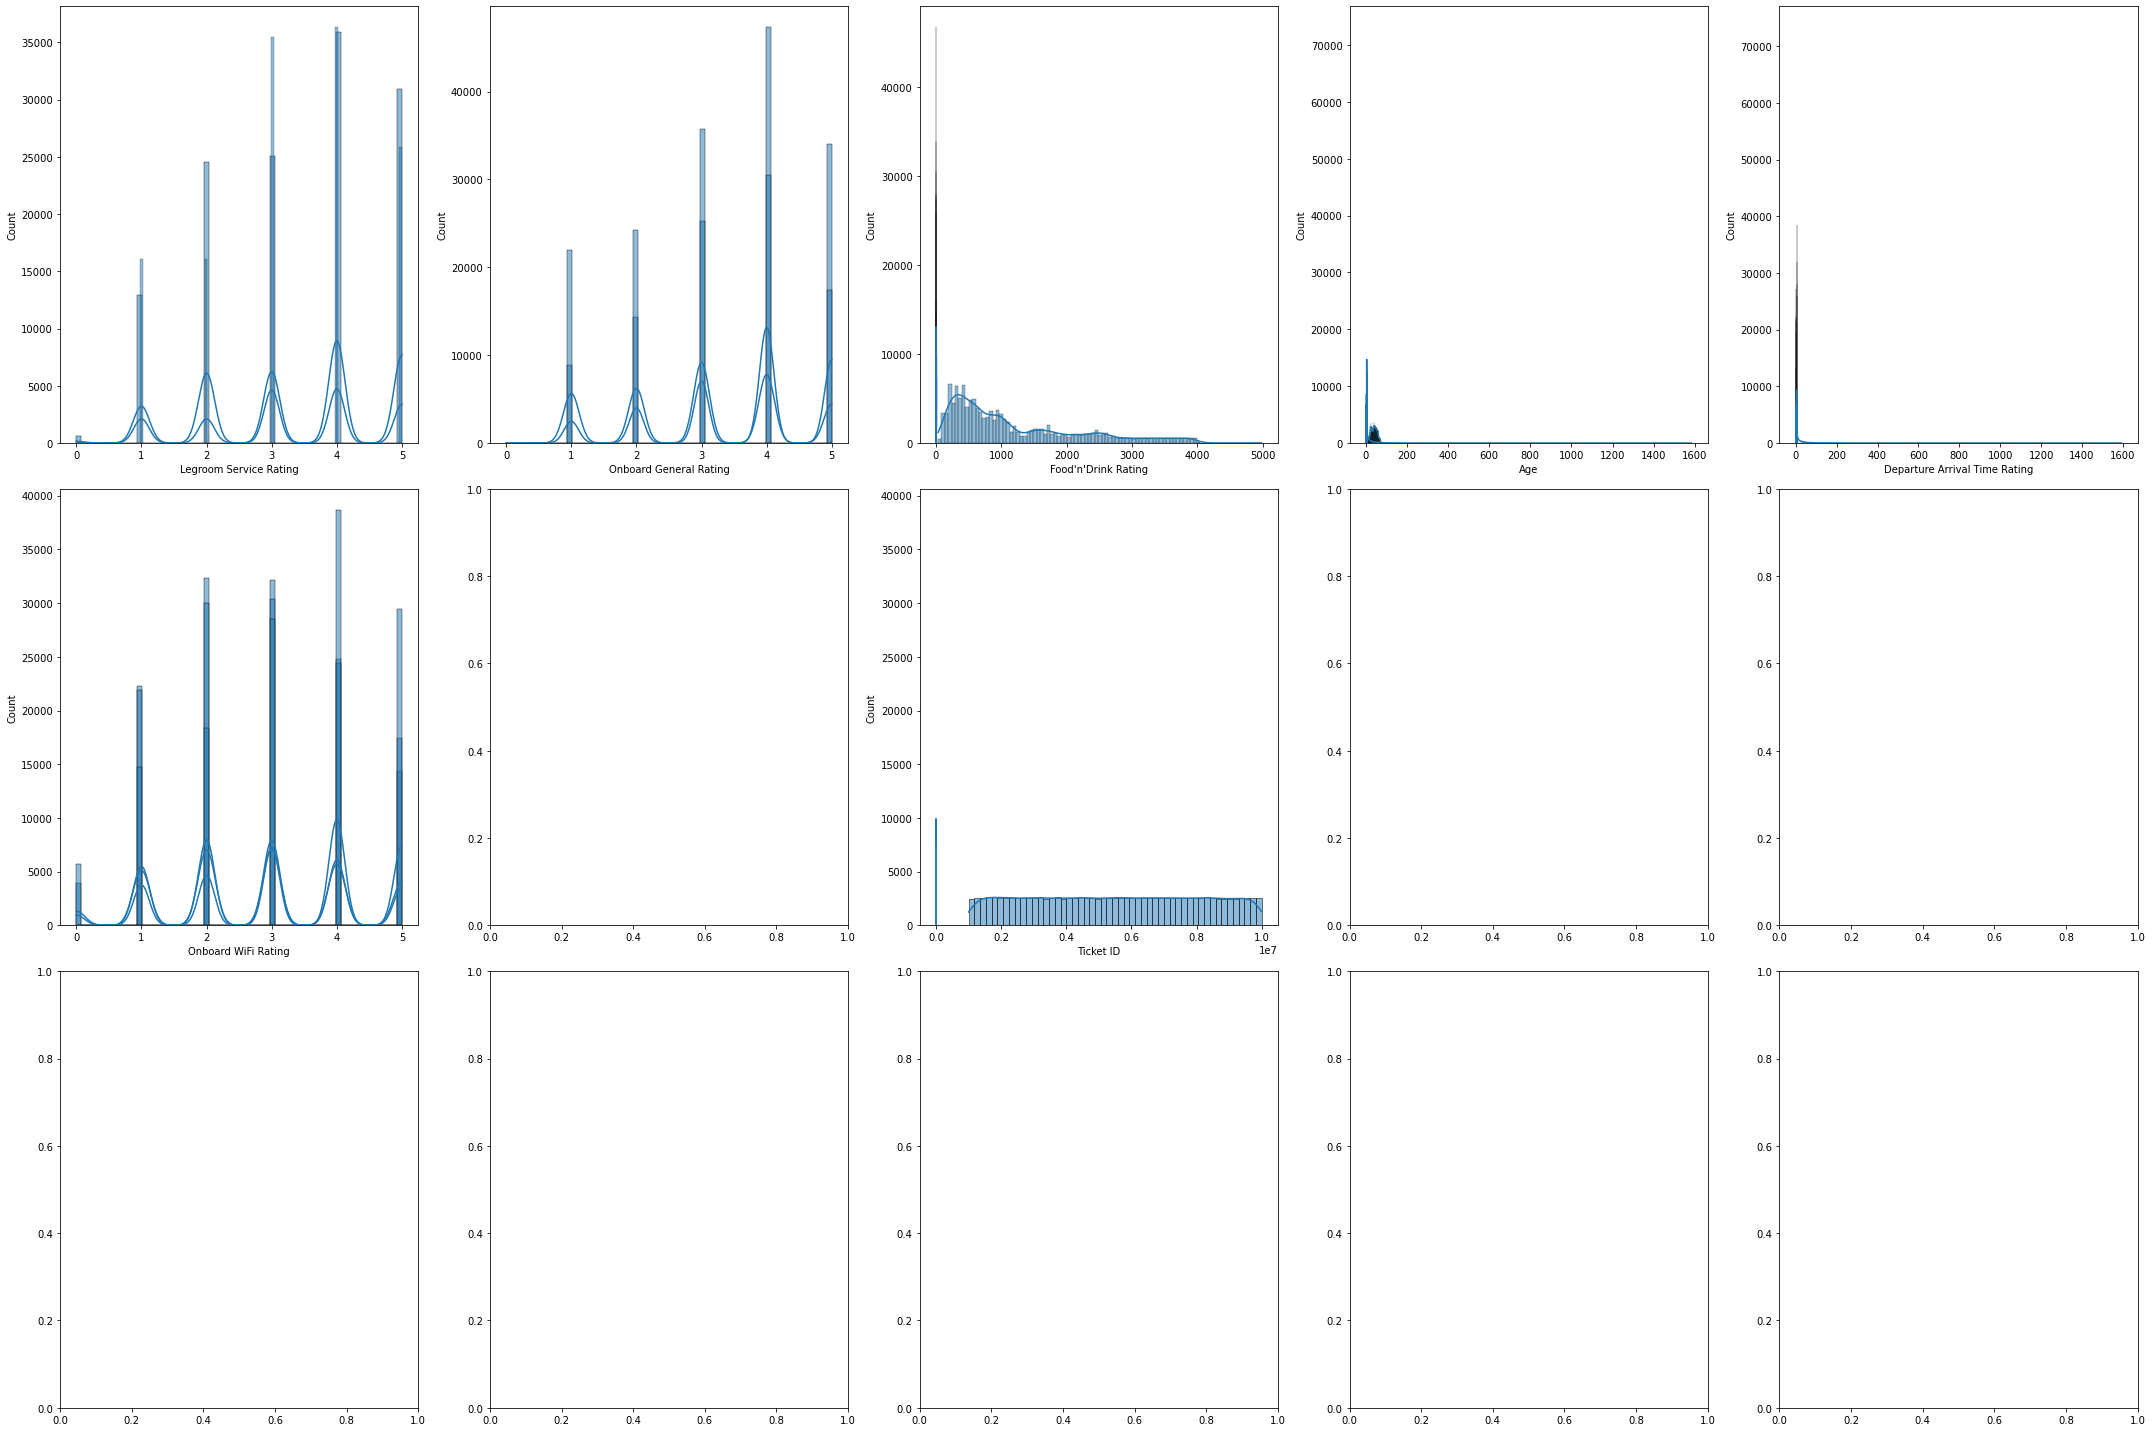

In [96]:
fig, axes = plt.subplots(3,5, figsize=(30,20))

sns.histplot(ax=axes[0, 0], data=df_trains, x='Legroom Service Rating', kde=True)
sns.histplot(ax=axes[0, 1], data=df_trains, x='Onboard General Rating', kde=True)
sns.histplot(ax=axes[0, 2], data=df_trains, x="Food'n'Drink Rating", kde=True)
sns.histplot(ax=axes[0, 3], data=df_trains, x='Age', kde=True)
sns.histplot(ax=axes[0, 4], data=df_trains, x='Departure Arrival Time Rating', kde=True)
sns.histplot(ax=axes[1, 0], data=df_trains, x='Onboard WiFi Rating', kde=True)
sns.histplot(ax=axes[1, 2], data=df_trains, x='Ticket ID', kde=True)
sns.histplot(ax=axes[0, 0], data=df_trains, x='Checkin Rating', kde=True)
sns.histplot(ax=axes[0, 1], data=df_trains, x='Track Location Rating', kde=True)
sns.histplot(ax=axes[0, 2], data=df_trains, x='Baggage Handling Rating', kde=True)
sns.histplot(ax=axes[0, 3], data=df_trains, x='Arrival Delay in Minutes', kde=True)
sns.histplot(ax=axes[0, 4], data=df_trains, x='Boarding Rating', kde=True)
sns.histplot(ax=axes[1, 0], data=df_trains, x='Online Booking Rating', kde=True)
sns.histplot(ax=axes[1, 2], data=df_trains, x='Onboard Entertainment Rating', kde=True)
sns.histplot(ax=axes[0, 2], data=df_trains, x='Distance', kde=True)
sns.histplot(ax=axes[0, 3], data=df_trains, x='Seat Comfort Rating', kde=True)
sns.histplot(ax=axes[0, 4], data=df_trains, x='Departure Delay in Minutes', kde=True)
sns.histplot(ax=axes[1, 0], data=df_trains, x='Onboard Service Rating', kde=True)
sns.histplot(ax=axes[1, 2], data=df_trains, x='Onboard Service Rating', kde=True)

plt.tight_layout()

In order visualize the histogram of one variable only, pass its name as parameter of the following function.

In [97]:
def histogram(var_name):
    plt.figure(figsize=(15,10))
    sns.histplot(data=df_trains, x=var_name, kde=True)
    plt.title("Histogram of " + var_name)

# 2) Preprocessing

Preprocessing phase is one of the most important ones when creating machine learning models. It usually consists of the following stages:

1. Handling missing values
2. Inspecting for redundancy
3. Column cleanup
4. Removing outliers

We have already covered point 1 in the previous scetion (EDA). In particular, we have replaced all the missing rows of each attribute with its mode. Furthermore we do not need to check for redundancy and the remaining points of the aforementioned list.

### 2.2) Inspecting for redundancy

### 2.3) Column cleanup

### 2.4) Removing outliers

# 3) Visualizing missing data

In [98]:
import missingno as msno

<AxesSubplot:>

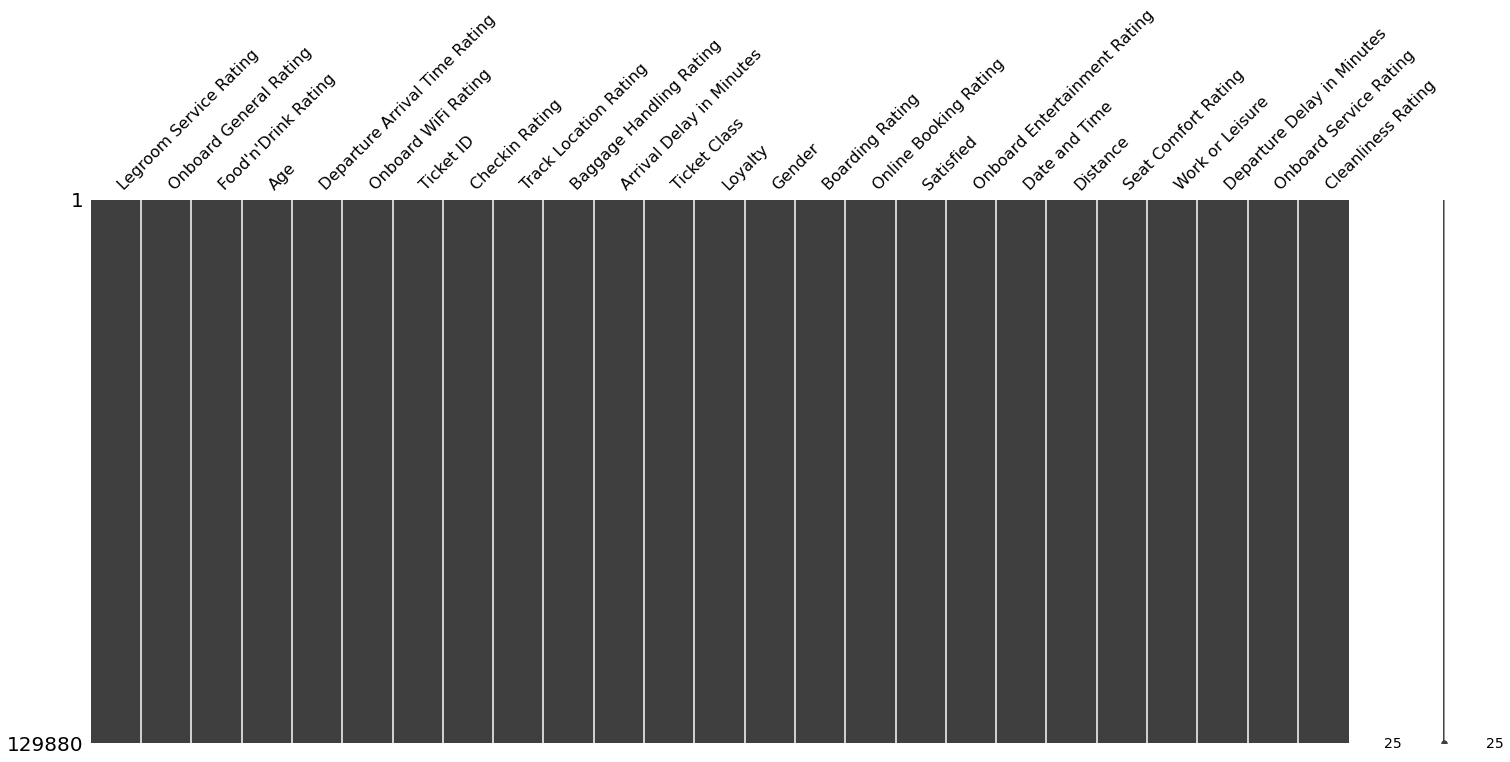

In [99]:
msno.matrix(df_trains)

<AxesSubplot:>

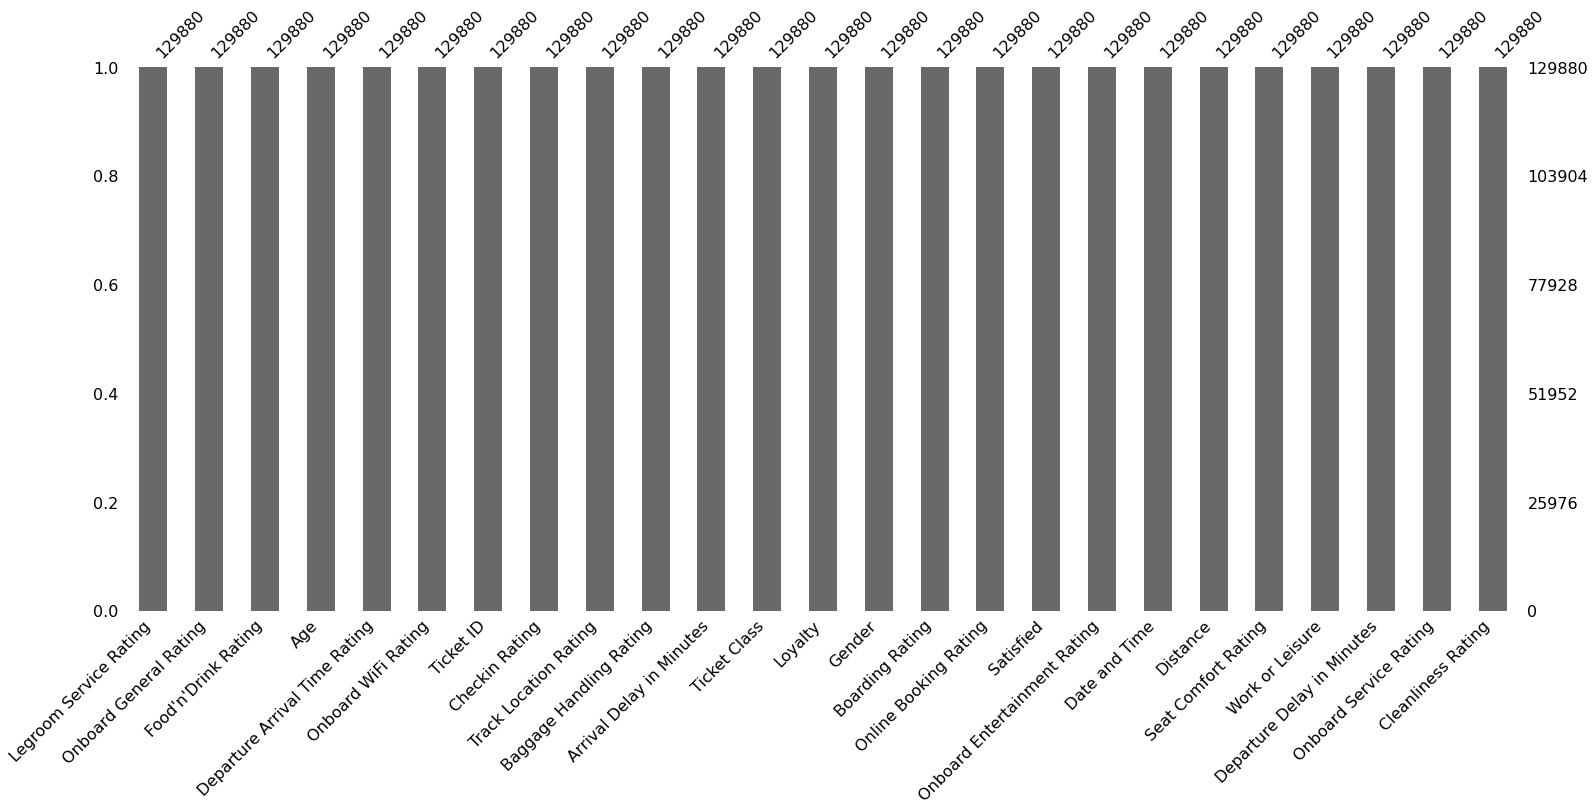

In [100]:
msno.bar(df_trains)

In [101]:
#msno.heatmap(df_trains, cmap='YlGnBu', labels=True)

In [102]:
def missing_values_table(df_trains):
        # Total missing values
        mis_val = df_trains.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df_trains.isnull().sum() / len(df_trains)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df_trains.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(df_trains)

KeyboardInterrupt: 

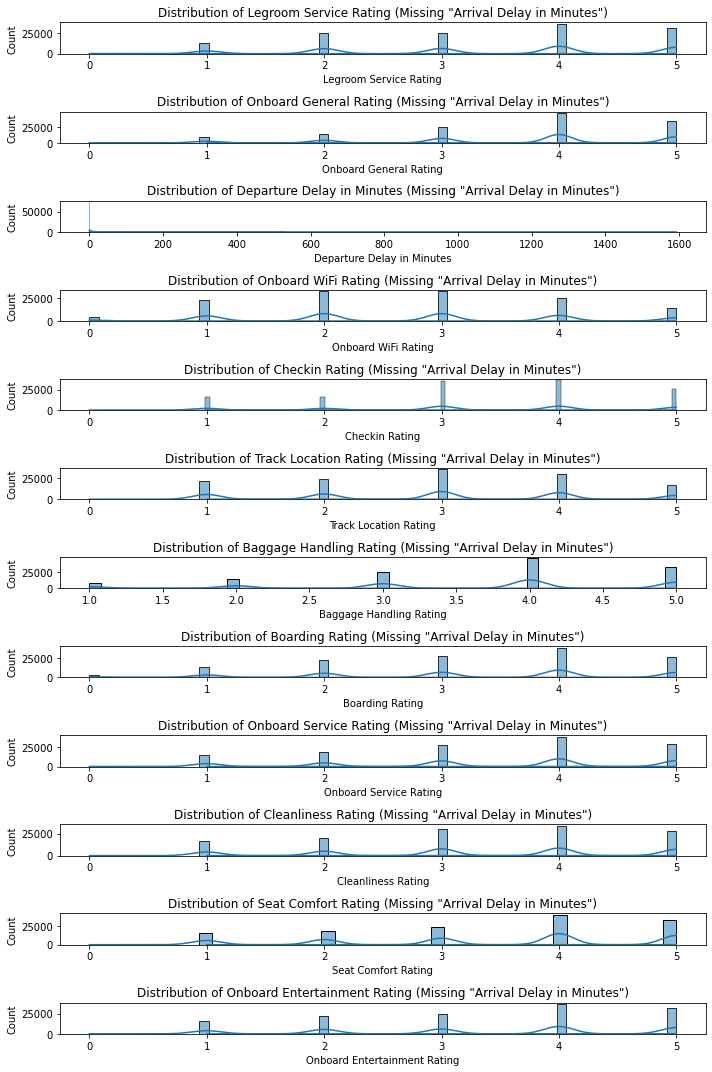

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter rows where 'deck' is NaN
missing_rows = df_trains[df_trains['Arrival Delay in Minutes'].isnull()]

# Select columns to create distribution plots
selected_columns = ['Legroom Service Rating', 'Onboard General Rating', 'Departure Delay in Minutes', 'Onboard WiFi Rating', 'Checkin Rating', 'Track Location Rating', 'Baggage Handling Rating', 'Boarding Rating', 'Onboard Service Rating', 'Cleanliness Rating', 'Seat Comfort Rating', 'Onboard Entertainment Rating']


# Create a figure with subplots
fig, axes = plt.subplots(len(selected_columns), 1, figsize=(10, 15))

# Plot distribution plots for each selected column
for i, col in enumerate(selected_columns):
    sns.histplot(data=missing_rows, x=col, ax=axes[i], kde=True)
    sns.histplot(data=df_trains, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col} (Missing "Arrival Delay in Minutes")')

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
#Drop rows with missing values
# Approach 1a: Drop rows with missing 'deck' values
dropped_rows = df_trains.dropna(subset=['Arrival Delay in Minutes'])

# Calculate the number of rows dropped
rows_dropped = len(df_trains) - len(dropped_rows)

# Print the number of rows dropped
print(f"Number of Rows Dropped: {rows_dropped}")

Number of Rows Dropped: 393


In [ ]:
# Approach 1b: Drop the 'deck' column
dropped_deck_column = df_trains.drop('Arrival Delay in Minutes', axis=1)

In [ ]:
from sklearn.impute import SimpleImputer

# Approach 2: Impute missing 'deck' values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = df_trains.copy()
df_imputed['Arrival Delay in Minutes'] = imputer.fit_transform(df_imputed[['Arrival Delay in Minutes']])

# Check the number of missing values after imputation
missing_values_after_imputation = df_imputed['Arrival Delay in Minutes'].isnull().sum()

# Print the number of missing values after imputation
print(f"Number of Missing Values after Imputation: {missing_values_after_imputation}")

Number of Missing Values after Imputation: 0


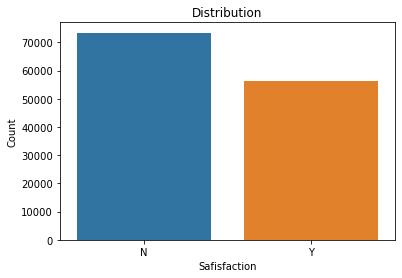

In [ ]:
# Countplots

sns.countplot(data=df_trains, x='Satisfied')
plt.title('Distribution')
plt.xlabel('Safisfaction')
plt.ylabel('Count')
plt.show()

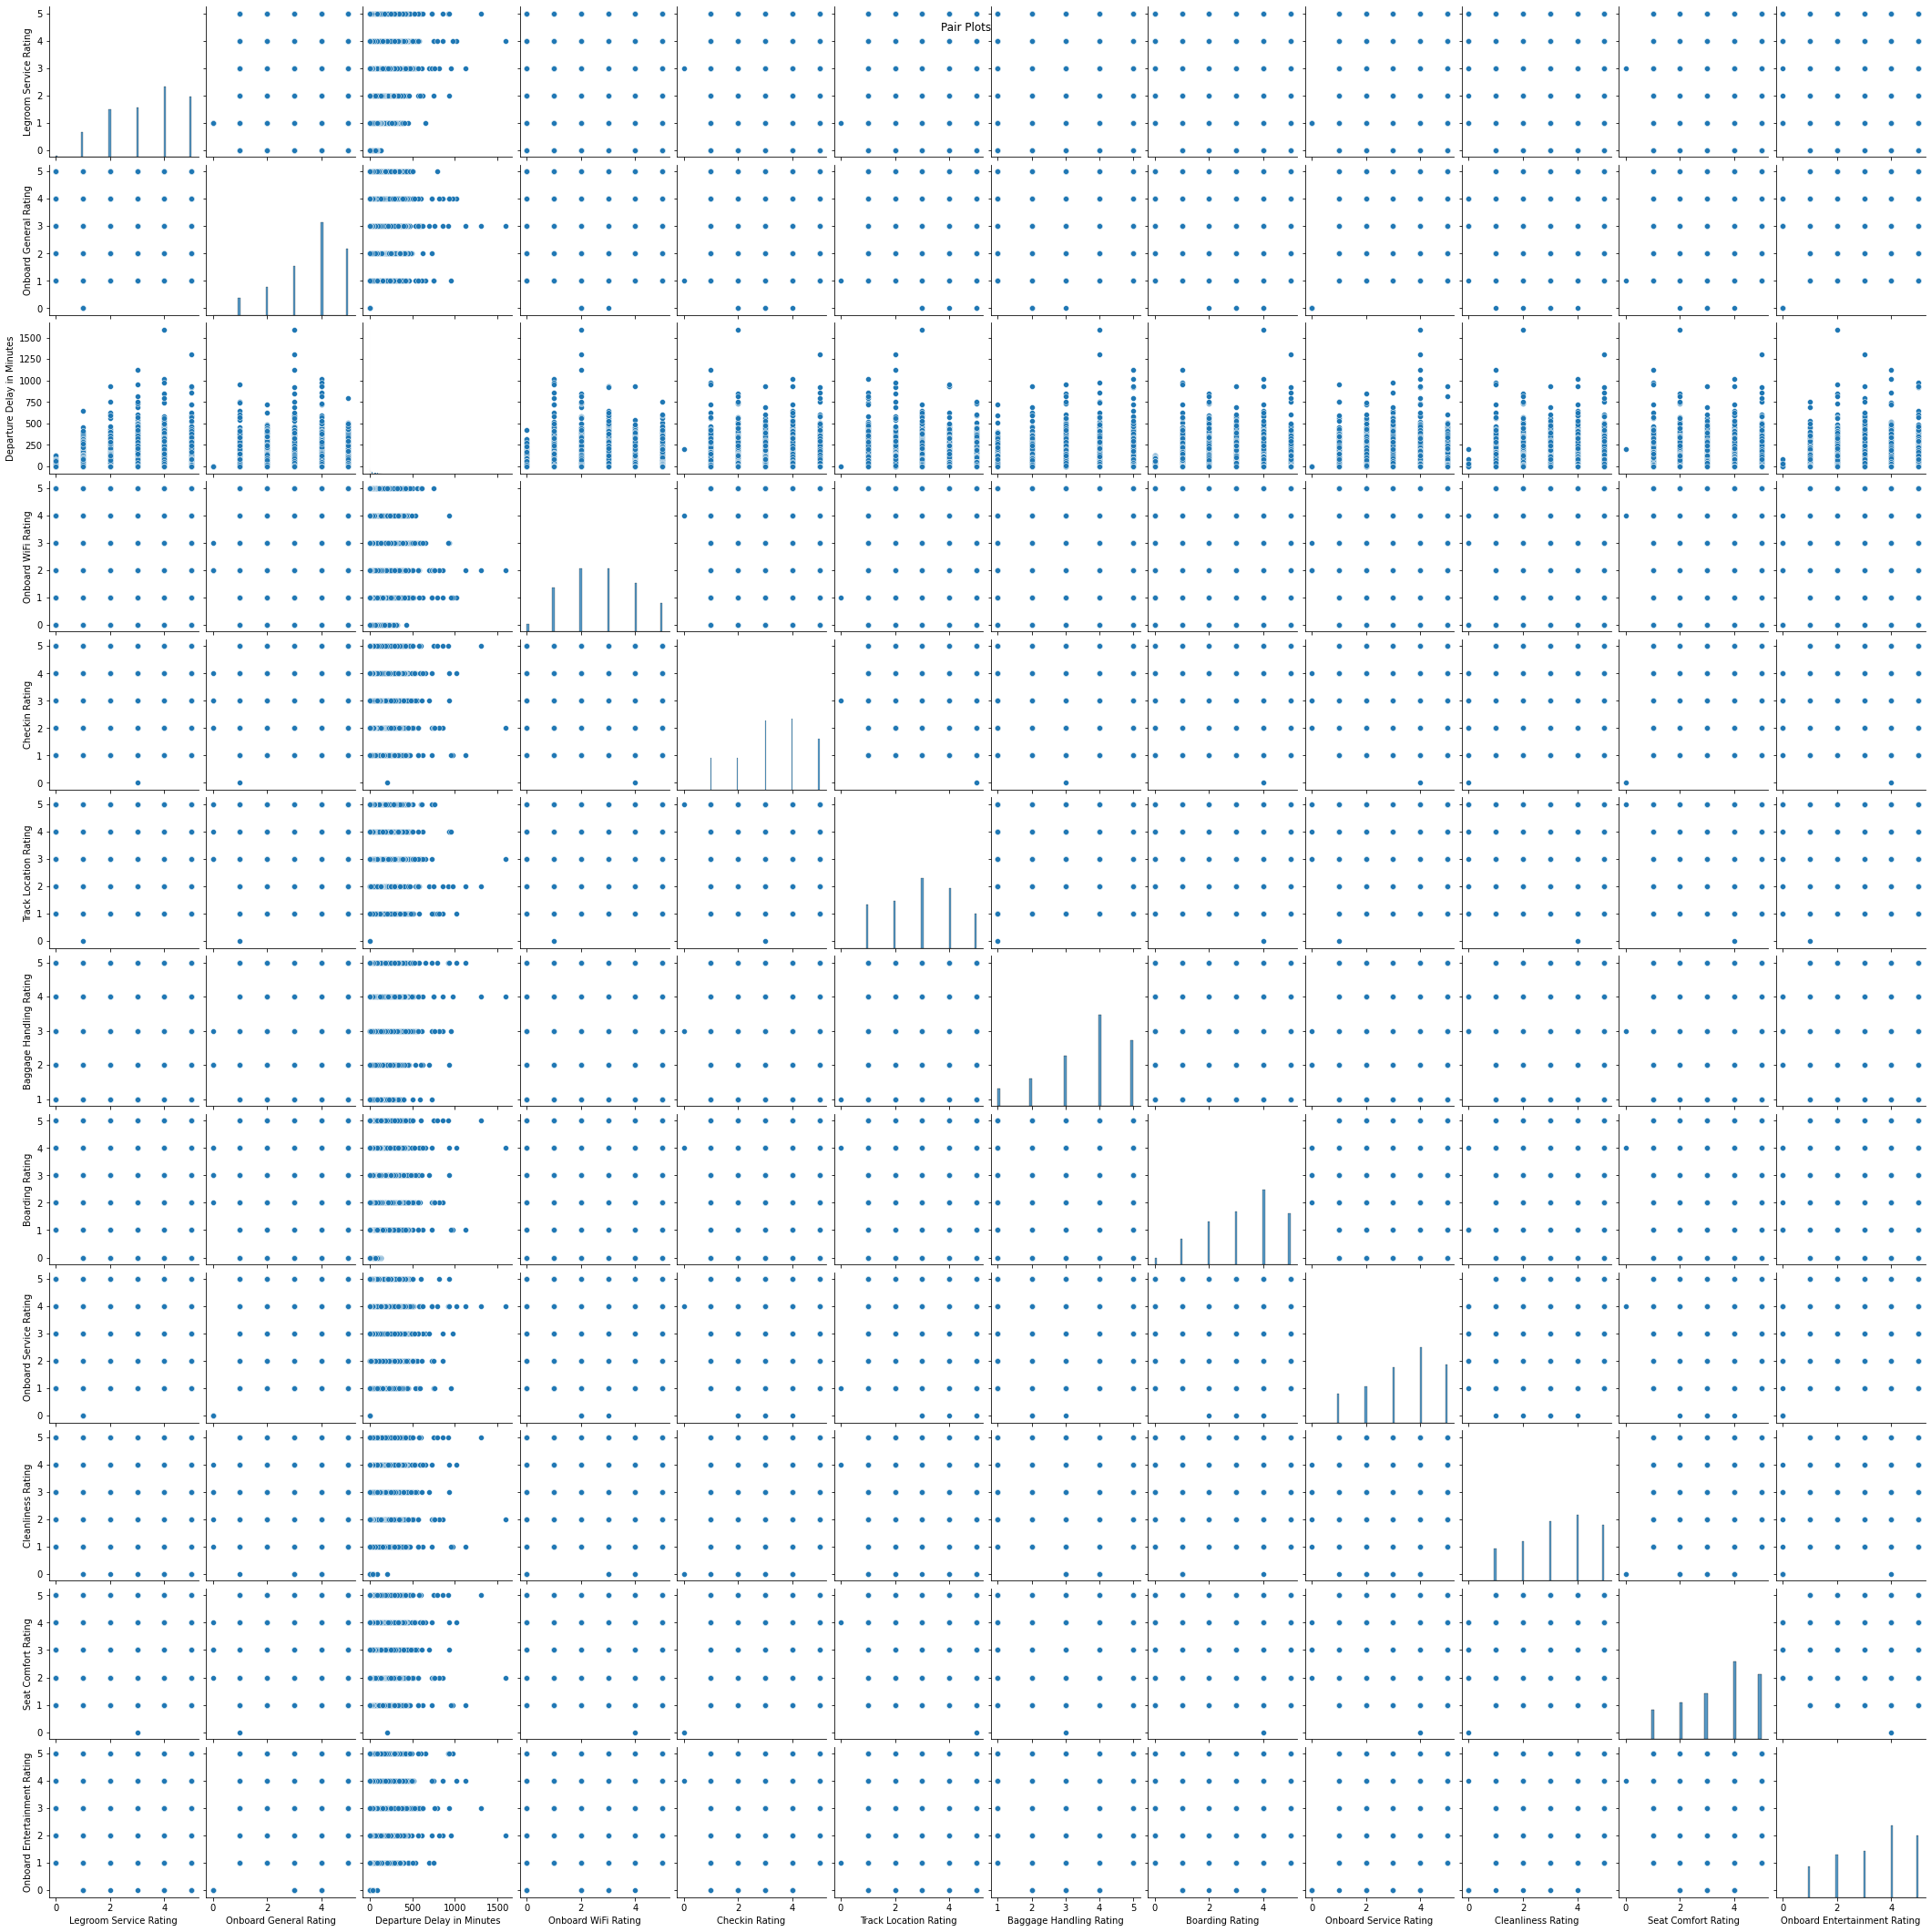

In [ ]:
# Pairplots

sns.pairplot(df_trains, vars=['Legroom Service Rating', 'Onboard General Rating', 'Departure Delay in Minutes', 'Onboard WiFi Rating', 'Checkin Rating', 'Track Location Rating', 'Baggage Handling Rating', 'Boarding Rating', 'Onboard Service Rating', 'Cleanliness Rating', 'Seat Comfort Rating', 'Onboard Entertainment Rating'])
plt.suptitle("Pair Plots")
plt.show()

<AxesSubplot:xlabel='Satisfied', ylabel='Age'>

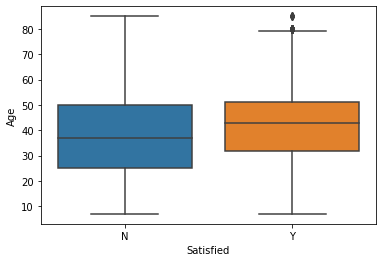

In [ ]:
# Boxplots

sns.boxplot(data=df_trains, x='Satisfied', y='Age')

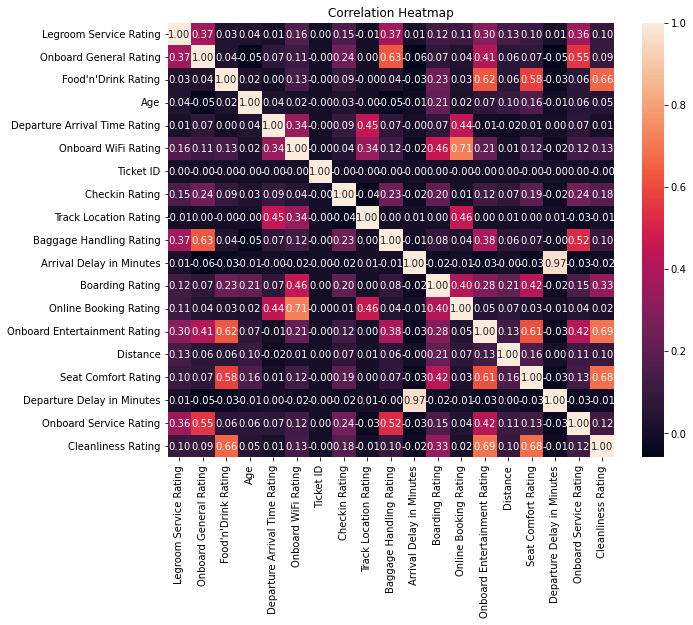

In [ ]:
# Heatmap
correlation_matrix = df_trains.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


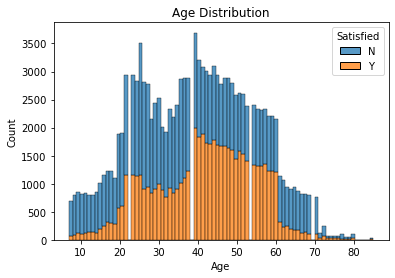

In [ ]:
#Histplot

sns.histplot(data=df_trains, x='Age', hue='Satisfied', multiple='stack')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


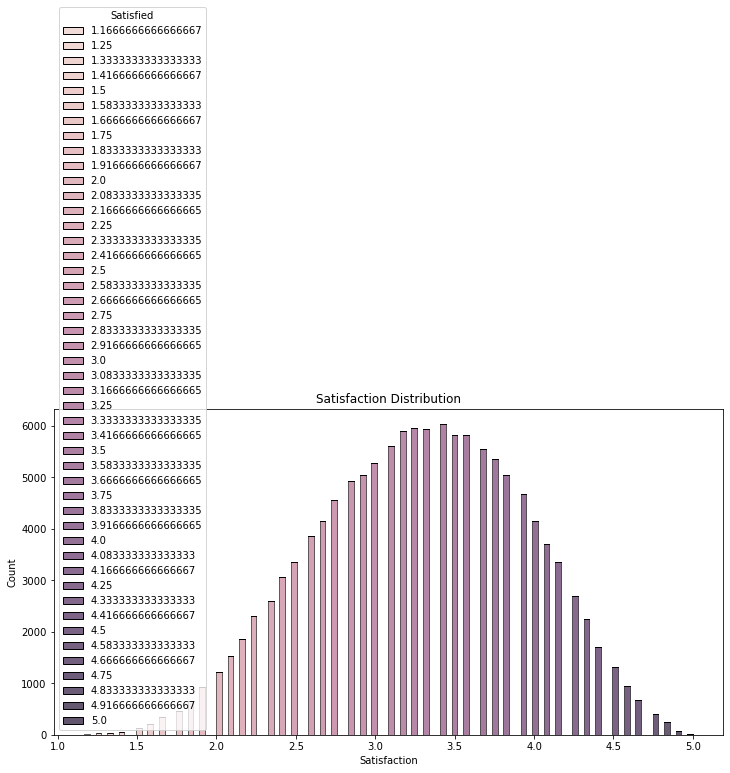

In [ ]:
# Feature engineering
df_trains['Satisfied'] = (df_trains['Legroom Service Rating'] + df_trains['Onboard General Rating'] + df_trains['Baggage Handling Rating'] + df_trains['Cleanliness Rating'] + df_trains['Checkin Rating'] + df_trains['Departure Arrival Time Rating'] + df_trains['Food\'n\'Drink Rating'] + df_trains['Onboard Entertainment Rating'] + df_trains['Onboard Service Rating'] + df_trains['Online Booking Rating'] + df_trains['Seat Comfort Rating'] + df_trains['Track Location Rating']) / 12

plt.figure(figsize=(12, 6))
sns.histplot(data=df_trains, x='Satisfied', hue='Satisfied', multiple='stack')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

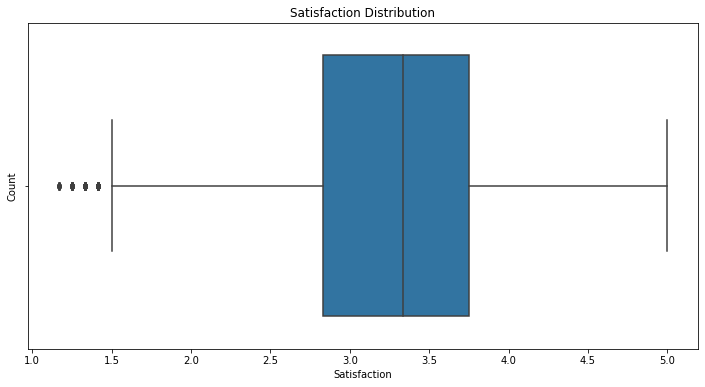

In [ ]:
# Feature engineering
df_trains['Satisfied'] = (df_trains['Legroom Service Rating'] + df_trains['Onboard General Rating'] + df_trains['Baggage Handling Rating'] + df_trains['Cleanliness Rating'] + df_trains['Checkin Rating'] + df_trains['Departure Arrival Time Rating'] + df_trains['Food\'n\'Drink Rating'] + df_trains['Onboard Entertainment Rating'] + df_trains['Onboard Service Rating'] + df_trains['Online Booking Rating'] + df_trains['Seat Comfort Rating'] + df_trains['Track Location Rating']) / 12

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_trains, x='Satisfied', hue='Satisfied')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

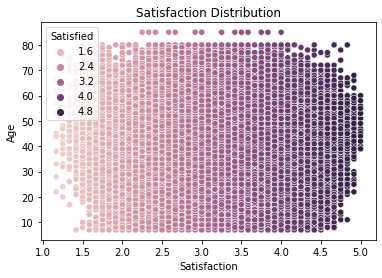

In [ ]:
# Scatterplot

sns.scatterplot(data=df_trains, x='Satisfied', y='Age', hue='Satisfied')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()

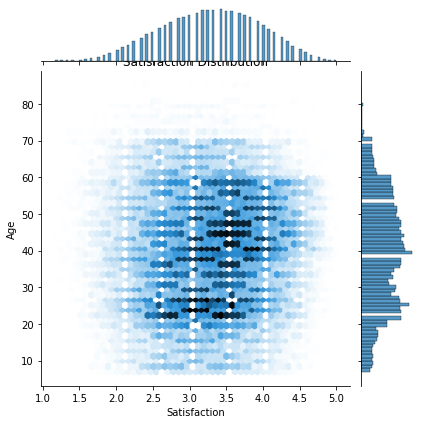

In [ ]:
# Jointplot

sns.jointplot(data=df_trains, x='Satisfied', y='Age', kind='hex')
plt.title('Satisfaction Distribution')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.show()


# Create train and test sets

In [ ]:
# Split data into train and test sets

from sklearn.model_selection import train_test_split
X = df_trains.drop('Satisfied', axis=1)
y = df_trains['Satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#It appears that you're encountering a ValueError because one or more columns in your dataset contain string values, and the StandardScaler expects numerical values. In your case, the 'Ticket Class' column seems to be a categorical variable with string values like 'Premium,' which cannot be directly scaled.

#You can use the LabelEncoder class from scikit-learn to convert the string values into numerical labels.
# https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn   

ValueError: could not convert string to float: 'Premium'

In [ ]:
# identify outliers
numerical_cols = df_trains.select_dtypes(include=['float64']).columns

Q1 = df_trains[numerical_cols].quantile(0.25)
Q3 = df_trains[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_trains_no_outliers = df_trains[~((df_trains[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_trains[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
numerical_cols = df_trains_no_outliers.select_dtypes(include=['float64']).columns
categorical_cols = df_trains_no_outliers.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
df_trains_no_outliers.loc[:, numerical_cols] = numerical_imputer.fit_transform(df_trains_no_outliers.loc[:, numerical_cols])

# Impute categorical columns with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_trains_no_outliers.loc[:, categorical_cols] = categorical_imputer.fit_transform(df_trains_no_outliers.loc[:, categorical_cols])



/var/folders/yx/jk8yrkgs75365fm8spx_bqz00000gn/T/ipykernel_18728/255251880.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trains_no_outliers.loc[:, numerical_cols] = numerical_imputer.fit_transform(df_trains_no_outliers.loc[:, numerical_cols])
/var/folders/yx/jk8yrkgs75365fm8spx_bqz00000gn/T/ipykernel_18728/255251880.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trains_no_outliers.loc[:, categorical_cols] = categorical_imputer.fit_transform(df_trains_no_outliers.loc[:, categorical_cols])
